# Analytical mapping

In [65]:
from sympy.core.containers import Tuple
from sympy import Matrix
from sympy.tensor import IndexedBase
from sympy import symbols, simplify, Symbol
from sympy import expand
from sympy import cos, sin, sqrt, pi
from sympy import lambdify

from numpy import linspace, meshgrid
from matplotlib import pyplot as plt

from sympde.topology import Mapping, DetJacobian
from sympde.topology import Domain

from sympde.core import Constant
from sympde.calculus import grad, dot, inner, cross, rot, curl, div
from sympde.calculus import laplace, hessian, bracket, convect
from sympde.topology import (dx, dy, dz)
from sympde.topology import (dx1, dx2, dx3)
from sympde.topology import ScalarFunctionSpace, VectorFunctionSpace
from sympde.topology import ScalarTestFunction
from sympde.topology import VectorTestFunction
from sympde.topology import LogicalExpr
from sympde.topology import SymbolicExpr
from sympde.topology import element_of
from sympde.topology import IdentityMapping
from sympde.topology import PolarMapping
from sympde.topology import TargetMapping
from sympde.topology import CzarnyMapping
from sympde.topology import CollelaMapping
from sympde.topology import TorusMapping
from sympde.topology import TwistedTargetMapping

## Collela mapping

In [66]:
DIM = 2
M = CollelaMapping('M', DIM)

In [67]:
x1, x2 = symbols('x1, x2')

constants = ['eps', 'k1', 'k2']
eps, k1, k2 = [Constant(i) for i in constants]

In [94]:
x = LogicalExpr(M, M[0])
y = LogicalExpr(M, M[1])

In [70]:
fx = lambdify((x1,x2,eps,k1,k2), x, 'numpy')
fy = lambdify((x1,x2,eps,k1,k2), y, 'numpy')

In [71]:
eps = 0.1 ; k1 = 1. ; k2 = 1.

In [77]:
T1 = linspace(0., 1., 50)
T2 = linspace(0., 1., 50)

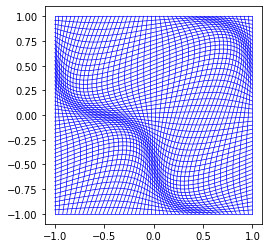

In [93]:
ax = plt.axes()
ax.set_aspect('equal')    

# plot columns
for t1 in T1:
    X = fx(t1, T2, eps, k1, k2)
    Y = fy(t1, T2, eps, k1, k2)
    plt.plot(X, Y, '-b',linewidth=0.7)

# plot lines
for t2 in T2:
    X = fx(T1, t2, eps, k1, k2)
    Y = fy(T1, t2, eps, k1, k2)
    plt.plot(X, Y, '-b', linewidth=0.7)    

## User mapping

In [129]:
class CustomMapping(Mapping):
    _expressions = {'x': 'A*(x1**2-x2**2)',
                    'y': '2*A*x1*x2'}

In [130]:
DIM = 2
M = CustomMapping('M', DIM)

In [131]:
x1, x2 = symbols('x1, x2')
A = Constant('A')

In [132]:
fx = lambdify((x1,x2,A), LogicalExpr(M, M[0]), 'numpy')
fy = lambdify((x1,x2,A), LogicalExpr(M, M[1]), 'numpy')

In [133]:
A = 1.

In [134]:
T1 = linspace(-1., 1., 50)
T2 = linspace(-1., 1., 50)

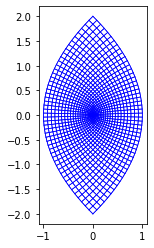

In [135]:
ax = plt.axes()
ax.set_aspect('equal')    

# plot columns
for t1 in T1:
    X = fx(t1, T2, A)
    Y = fy(t1, T2, A)
    plt.plot(X, Y, '-b',linewidth=0.7)

# plot lines
for t2 in T2:
    X = fx(T1, t2, A)
    Y = fy(T1, t2, A)
    plt.plot(X, Y, '-b', linewidth=0.7)   